# Intorduction to Regression with Neural Networks in TensorFlow

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating data to view and fit

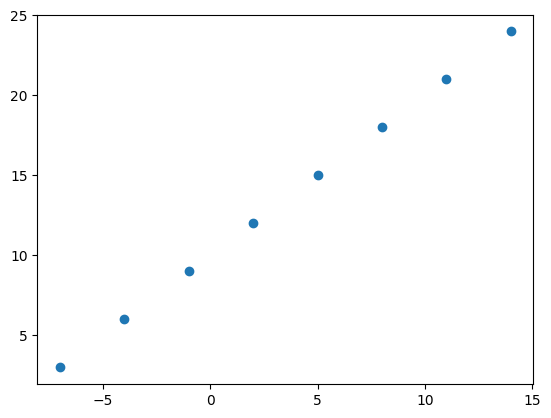

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X[0].ndim

0

In [8]:
# Turn our data into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

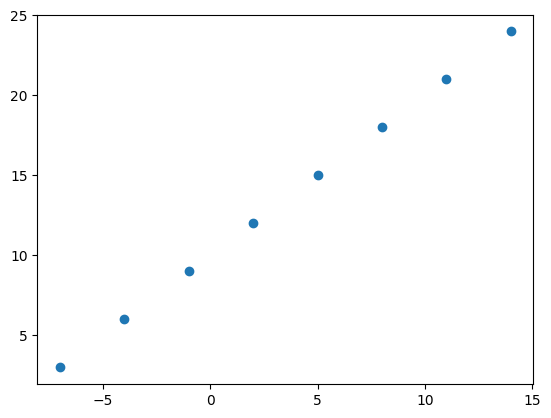

In [10]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compile the model - define the loss function, the optimizer and the evaluation metrics.
3. Fit the model - find patterns between X and y between features and labels

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 13.1665 - mae: 13.1665
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 13.0340 - mae: 13.0340
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.9015 - mae: 12.9015
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.7690 - mae: 12.7690
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.6365 - mae: 12.6365


In [12]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [13]:
# make a prediction
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[4.644637]], dtype=float32)

## Improve our model

In [14]:
# rebuild the model
# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 12.5040 - mae: 12.5040
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.3715 - mae: 12.3715
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.2390 - mae: 12.2390
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.1065 - mae: 12.1065
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.9740 - mae: 11.9740
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8415 - mae: 11.8415
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.7090 - mae: 11.7090
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.5765 - mae: 11.5765
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 11.4440 - mae: 11.4440
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.3115 - mae: 11.3115
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 11.1790 - mae: 11.1790
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 11.0465 - mae: 11.0465
Epoch 13/100
1/1 ━━━━━━━━

In [15]:
# make a prediction
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[29.892132]], dtype=float32)

In [16]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 15.1584 - mae: 15.1584
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 14.3449 - mae: 14.3449
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.6126 - mae: 13.6126
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.8896 - mae: 12.8896
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 12.1713 - mae: 12.1713
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 11.4552 - mae: 11.4552
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 10.7394 - mae: 10.7394
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.0221 - mae: 10.0221
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 9.3010 - mae: 9.3010
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 8.5739 - mae: 8.5739
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 7.8380 - mae: 7.8380
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 7.0908 - mae: 7.0908
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 50)                  │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 455 (1.78 KB)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 304 (1.19 KB)

In [18]:
# make a prediction
y_pred = model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[27.474913]], dtype=float32)

## Evaluating the model

In [19]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [20]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

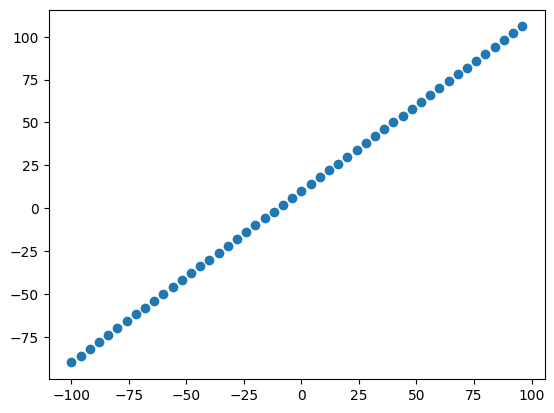

In [21]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets...

*  Training set
*  Validation set
*  Test set

In [22]:
len(X)

50

In [23]:
# split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

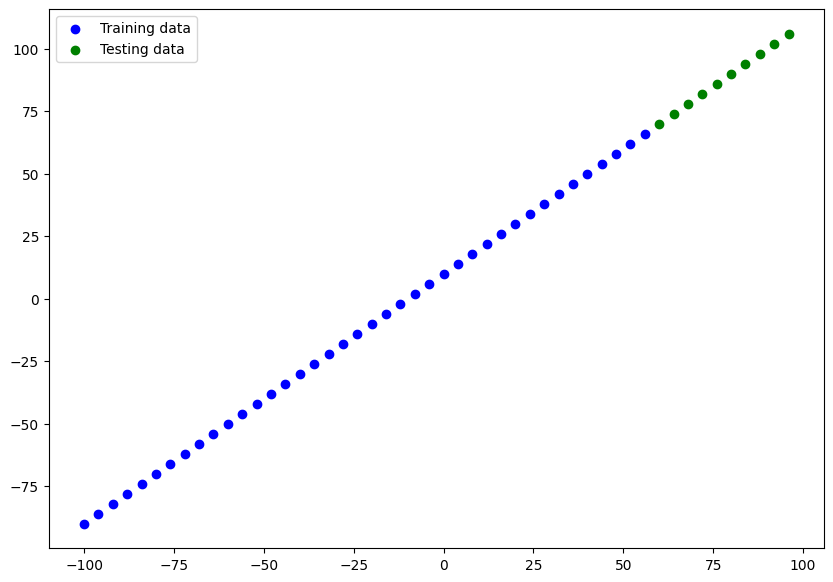

In [24]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [25]:
# 1. Create a model using the Sequential API
model2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 105.2546 - mae: 105.2546  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.0864 - mae: 70.0864 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 35.1120 - mae: 35.1120 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.2525 - mae: 8.2525 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.9101 - mae: 8.9101 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7.8500 - mae: 7.8500
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.8279 - mae: 10.8279 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.6517 - mae: 7.6517 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0010 - mae: 12.0010 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1705 - mae: 8.1705
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.8216 - mae: 8.8216 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.7778 - mae: 7.7778 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

In [26]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

### Visualize the model

In [27]:
# create amodel that builds automatically by definig the input shape in teh first layer
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model3 = tf.keras.Sequential([
    # tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="first_model")

# 2. Compile the model
model3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "first_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
# 3. Fit the model
model3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=1)
# model3.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 41.8831 - mae: 41.8831 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.8808 - mae: 31.8808 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.0524 - mae: 23.0524 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.0393 - mae: 19.0393 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.0439 - mae: 17.0439 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.1016 - mae: 16.1016 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4019 - mae: 16.4019 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0224 - mae: 12.0224 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.9448 - mae: 14.9448
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.8725 - mae: 15.8725 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12.0058 - mae: 12.0058 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0245 - mae: 15.0245 
Epoch 13/100
2/2 ━━━━━━━

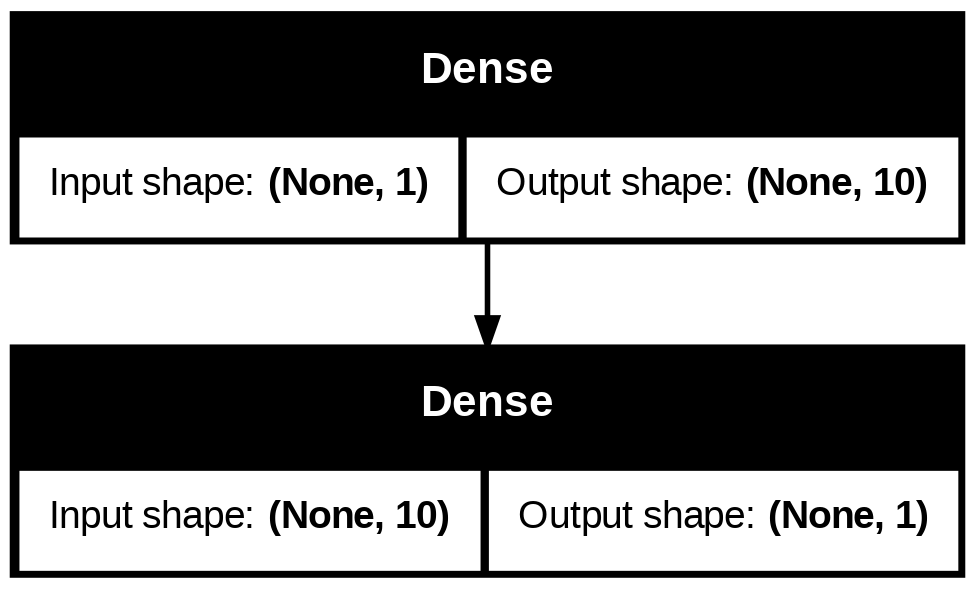

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model3, show_shapes=True)

### Visualizing models prediction

In [30]:
# Make predictions
y_pred = model3.predict(tf.expand_dims(X_test, axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[33.848457],
       [36.000988],
       [38.153522],
       [40.306053],
       [42.458584],
       [44.61112 ],
       [46.76365 ],
       [48.916183],
       [51.068714],
       [53.22125 ]], dtype=float32)

In [31]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();

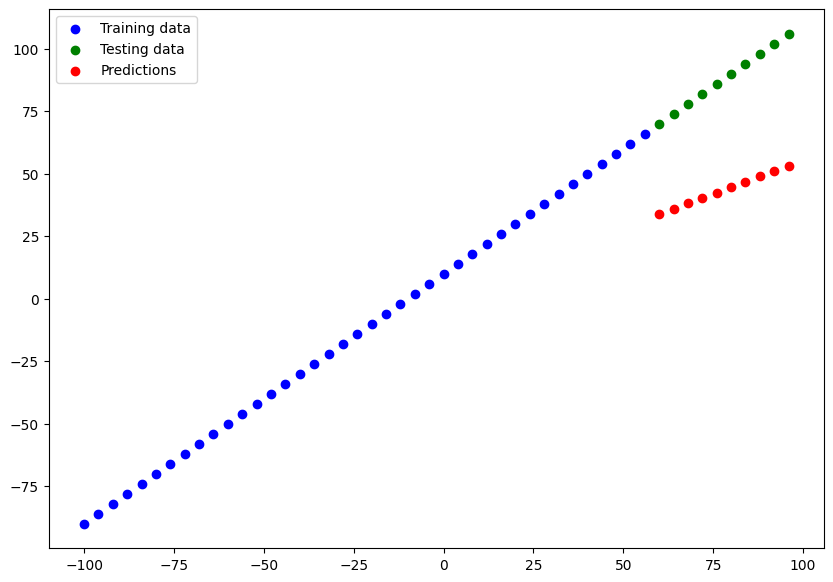

In [32]:
plot_predictions(predictions=y_pred)

### Evaluation metrics

In [33]:
# Evaluate on the test set
model3.evaluate(tf.expand_dims(X_test, axis=-1), y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 44.4651 - mae: 44.4651


[44.46514892578125, 44.46514892578125]

In [34]:
# Calculate the mean absolute error
mae = tf.keras.losses.MeanAbsoluteError()(y_test, y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.46515>

In [35]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.46515>

In [36]:
# Calculate the mean squared error
mse = tf.keras.losses.MeanSquaredError()(y_test, y_pred)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2005.3079>

In [37]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.keras.metrics.MeanAbsoluteError()(y_test, tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.keras.losses.MeanSquaredError()(y_test, y_pred)

### Run experiments to improve model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


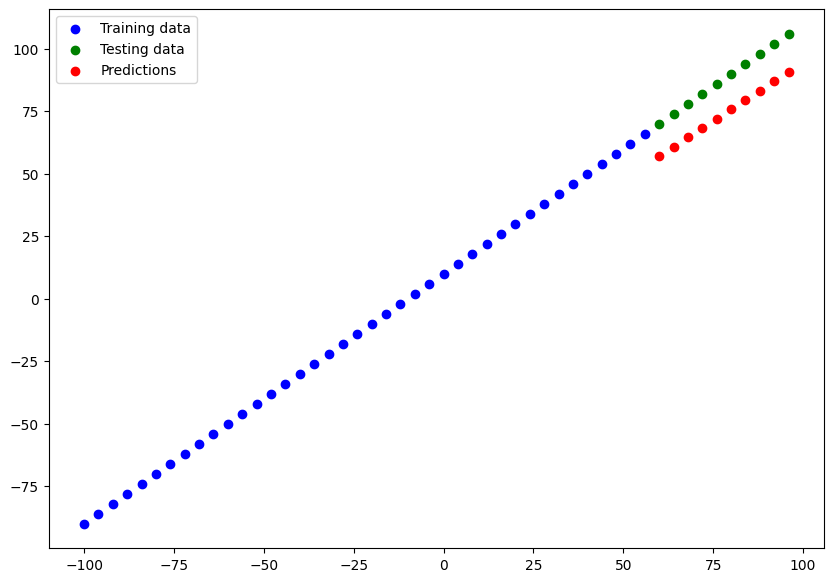

In [38]:
y_preds_2 = model2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_2)

In [39]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=14.067568>,
 <tf.Tensor: shape=(), dtype=float32, numpy=198.5387>)

In [40]:
# create amodel that builds automatically by definig the input shape in the first layer
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model4 = tf.keras.Sequential([
    # tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="first_model")

# 2. Compile the model
model4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 42.4713 - mae: 42.4713 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.0401 - mae: 24.0401 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.9265 - mae: 19.9265
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.8608 - mae: 17.8608 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.9695 - mae: 16.9695 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.4090 - mae: 11.4090 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.2130 - mae: 15.2130 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.0059 - mae: 16.0059 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0296 - mae: 12.0296 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0284 - mae: 15.0284 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 11.0832 - mae: 11.0832 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 14.9326 - mae: 14.9326 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


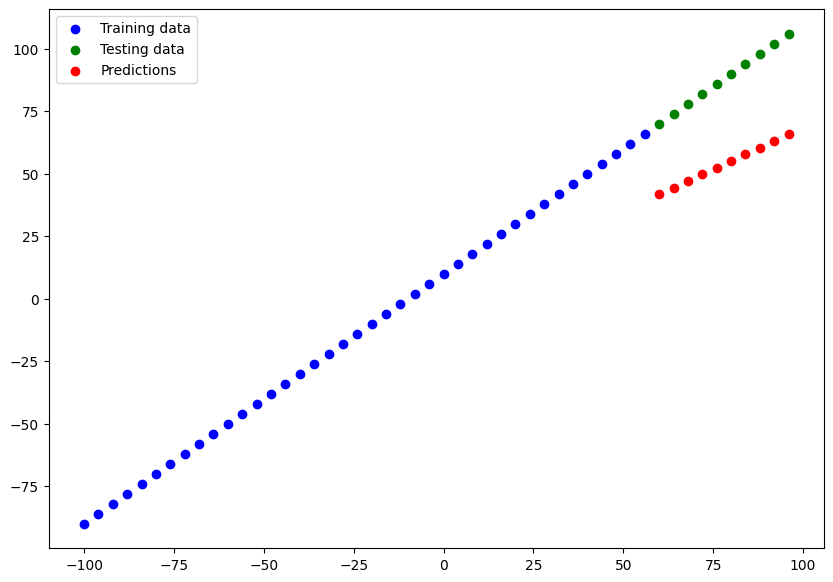

In [41]:
y_preds_4 = model4.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_4)

In [42]:
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=34.188267>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1183.3186>)

In [43]:
# create amodel that builds automatically by definig the input shape in the first layer
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model5 = tf.keras.Sequential([
    # tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="first_model")

# 2. Compile the model
model5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model5.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.4603 - mae: 31.4603 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 26.2988 - mae: 26.2988 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.3757 - mae: 24.3757 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7949 - mae: 14.7949 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.9337 - mae: 18.9337 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.1316 - mae: 13.1316 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0687 - mae: 15.0687 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.7740 - mae: 15.7740 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.7569 - mae: 11.7569 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7138 - mae: 14.7138 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.7365 - mae: 15.7365 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11.9526 - mae: 11.9526 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


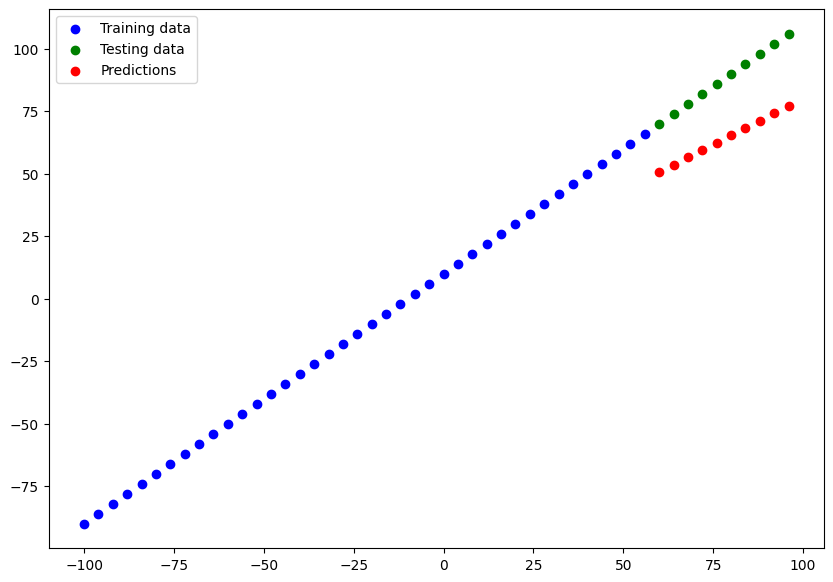

In [44]:
y_preds_5 = model5.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_5)

In [45]:
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=24.141895>,
 <tf.Tensor: shape=(), dtype=float32, numpy=592.2145>)

In [46]:
import pandas as pd

model_results = [["model_2", mae_2.numpy(), mse_2.numpy()],
                  ["model_4", mae_4.numpy(), mse_4.numpy()],
                 ["model_5", mae_5.numpy(), mse_5.numpy()]]

model_df = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
model_df

,model,mae,mse
0,model_2,14.067568,198.538696
1,model_4,34.188267,1183.318604
2,model_5,24.141895,592.214478


## Tracking experiments

## Saving models

In [47]:
# Save the model
model2.save("model2.keras")

In [48]:
# Save in hdf5
model2.save("model2.h5")

In [49]:
# Loading the model
model_2_loaded = tf.keras.models.load_model("model2.keras")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


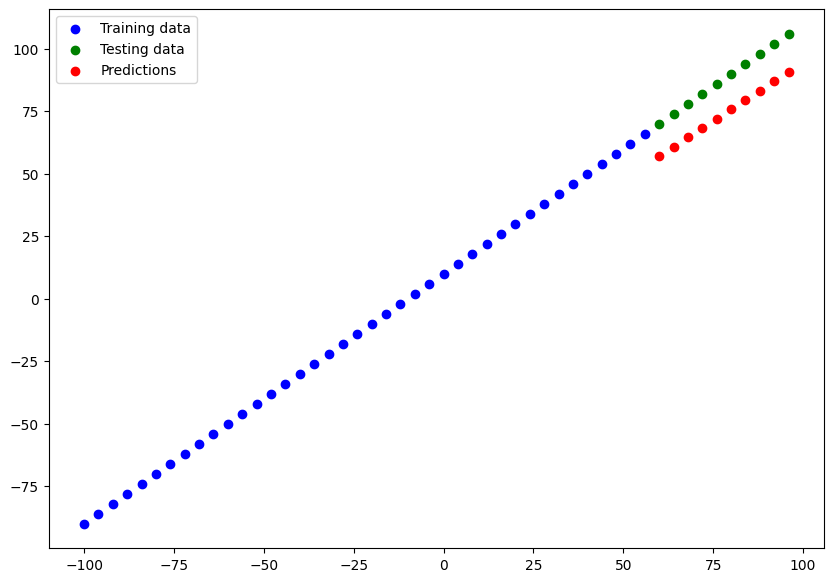

In [50]:
y_preds_2_loaded = model_2_loaded.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_2_loaded)

## Download a model or any file from google colab

In [51]:
from google.colab import files

# files.download("model2.keras")

In [52]:
# save file to google drive
# first mount google drive
!cp /content/model2.keras "/content/drive/MyDrive/Colab Notebooks"

In [53]:
!ls "/content/drive/MyDrive/Colab Notebooks"

 00_tensorflow_fundamentals.ipynb		      dog-vision.ipynb	 Untitled0.ipynb
 01_neural_network_regression_with_tensorflow.ipynb   lot.ipynb
'Copy of Untitled0.ipynb'			      model2.keras


## A larger example

In [54]:
# Import required libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
# one hot encode
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


# Create X & y values (features and labels)
# Create training and test sets
# Build a neural network

In [57]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [58]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Build a neural network
tf.random.set_seed(42)

# Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13262.7695 - mae: 13262.7695
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13247.6514 - mae: 13247.6514
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13231.1631 - mae: 13231.1631
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13212.7197 - mae: 13212.7197
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13191.6738 - mae: 13191.6738
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13167.5166 - mae: 13167.5166
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13139.9072 - mae: 13139.9072 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13108.6396 - mae: 13108.6396 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13073.5801 - mae: 13073.5801  
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13034.6055 - mae: 13034.6055 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12991.5840 - mae: 12991.5840 
Epoch 12/100
34/34 ━━━━━

In [60]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7695.9858 - mae: 7695.9858  


[7568.02197265625, 7568.02197265625]

## Try improving the model
1. add extra layer
2. increase number of epochs

In [61]:
# Build a neural network
tf.random.set_seed(42)

# Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13253.0391 - mae: 13253.0391
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13098.7451 - mae: 13098.7451
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12780.3916 - mae: 12780.3916
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12153.6670 - mae: 12153.6670 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11084.4805 - mae: 11084.4805 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9664.9697 - mae: 9664.9697 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8275.6719 - mae: 8275.6719  
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7510.5483 - mae: 7510.5483 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7380.4336 - mae: 7380.4336
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7353.6094 - mae: 7353.6094 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7332.9863 - mae: 7332.9863 
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━

In [62]:
# Evaluate larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5054.3242 - mae: 5054.3242  


[4903.92138671875, 4903.92138671875]

In [63]:
# Build a neural network
tf.random.set_seed(42)

# Create a model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model
history_3 = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [64]:
# Evaluate 3rd model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3483.2383 - mae: 3483.2383  


[3416.773193359375, 3416.773193359375]

Text(0.5, 0, 'epochs')

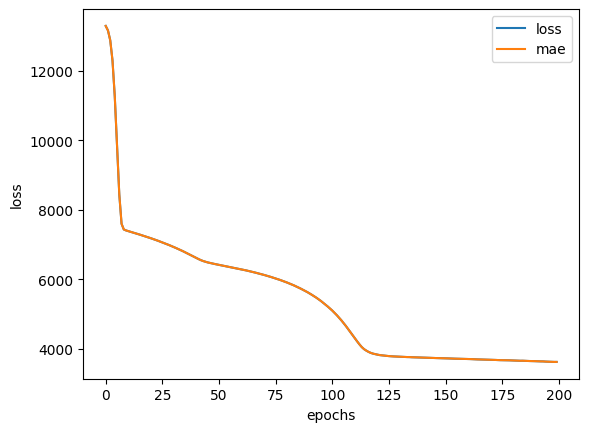

In [65]:
# Plot history
pd.DataFrame(history_3.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)
normalization is prefered

In [66]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (usingTurner's method)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [69]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [70]:
# Build a neural network
tf.random.set_seed(42)

# Create a model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])

# Fit the model
history_4 = insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13298.0039 - mae: 13298.0039
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13292.8291 - mae: 13292.8291 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13278.9912 - mae: 13278.9912 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13246.7666 - mae: 13246.7666 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13185.1475 - mae: 13185.1475  
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13083.0947 - mae: 13083.0947 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12929.6660 - mae: 12929.6660 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12714.4443 - mae: 12714.4443 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12427.4160 - mae: 12427.4160
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12059.4199 - mae: 12059.4199 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11615.2432 - mae: 11615.2432 
Epoch 12/200
34/34 ━

In [71]:
# Evaluate 4th model
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3214.3347 - mae: 3214.3347  


[3160.889404296875, 3160.889404296875]

Text(0.5, 0, 'epochs')

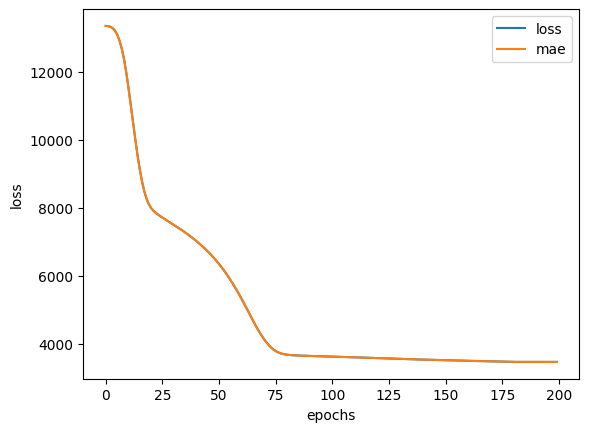

In [72]:
# Plot history
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [73]:
from PIL import Image as im
img_data = im.fromarray(game_3c)